In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [86]:
df = pd.read_csv("Telco_Customer_Churn.csv")

In [24]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.shape


(7043, 21)

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Removing Unnecessary Columns

In [27]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploring Unique Values in Categorical Columns

In [28]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in features:
    print(col, df[col].unique())
    print("=============================")

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


Checking for Missing Values

In [29]:
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


View the TotalCharges Column Values

In [45]:
df["TotalCharges"].values



array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [42]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [46]:
df["tenure"].values


array([ 1, 34,  2, ..., 11,  4, 66])

In [47]:
# Convert 'tenure' to integer
df['tenure'] = df['tenure'].astype(int)


In [48]:
# Convert categorical columns to 'category' type
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']
df[categorical_columns] = df[categorical_columns].astype('category')

In [49]:
# Step 3: Handle missing values
# Replace NaN in 'TotalCharges' with the median (since it's a numerical column)
total_charges_median = df['TotalCharges'].median()
# Replace NaN in 'TotalCharges' with the median (without using inplace=True)
df['TotalCharges'] = df['TotalCharges'].fillna(total_charges_median)

# Replace NaN in categorical columns with the mode (without using inplace=True)
for col in categorical_columns:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

Visualizing Churn Distribution

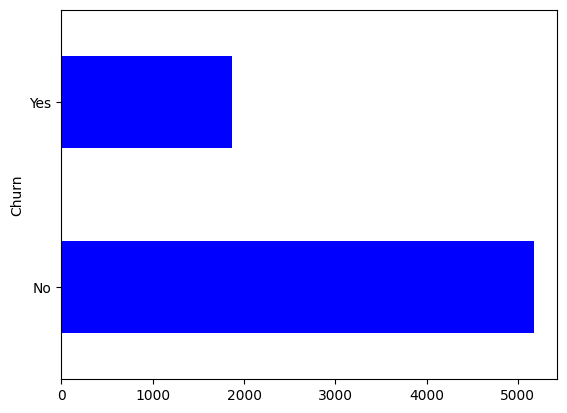

In [52]:
df["Churn"].value_counts().plot(kind='barh' , color = 'blue');


In [53]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


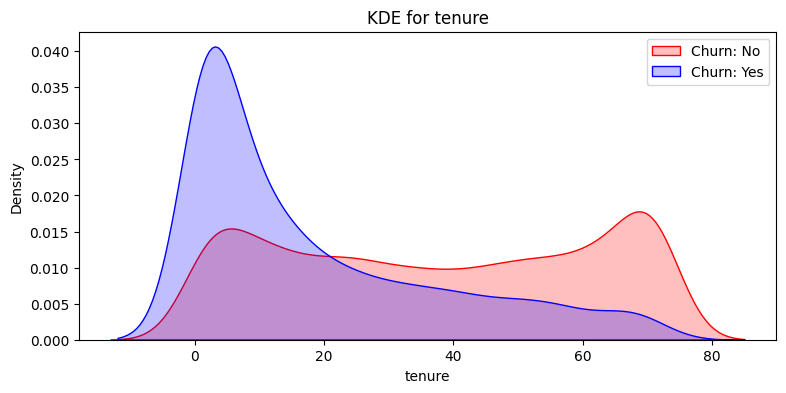

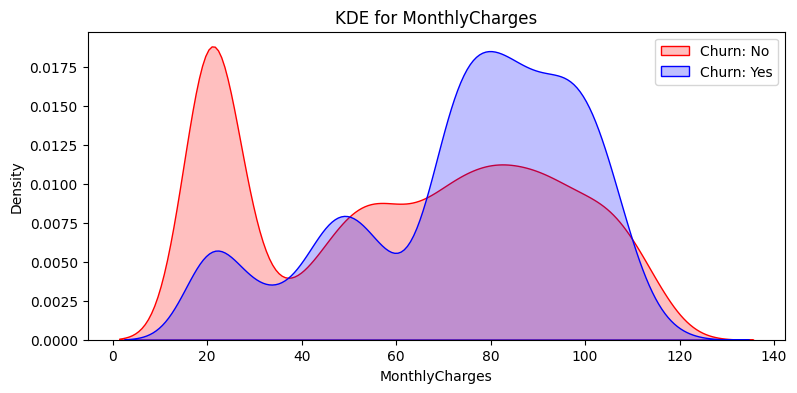

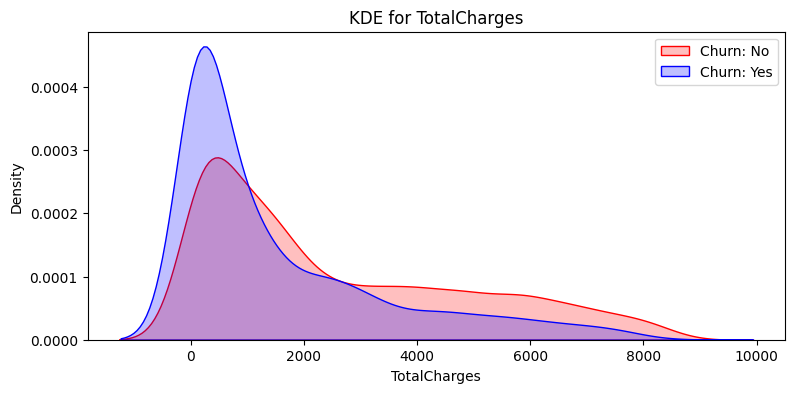

In [57]:
def plot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {feature}")

    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color='red', label='Churn: No', shade=True)
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color='blue', label='Churn: Yes', shade=True)

    plt.legend()  # legend
    plt.show()  # Ensure the plot is displayed properly

plot('tenure')
plot('MonthlyCharges')
plot('TotalCharges')

Churn Distribution by Contract

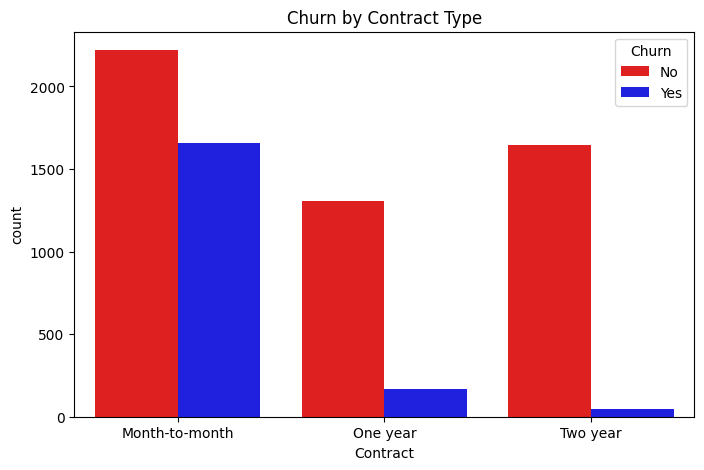

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette=['red', 'blue'])
plt.title('Churn by Contract Type')
plt.show()

Monthly Charges Distribution by Churn

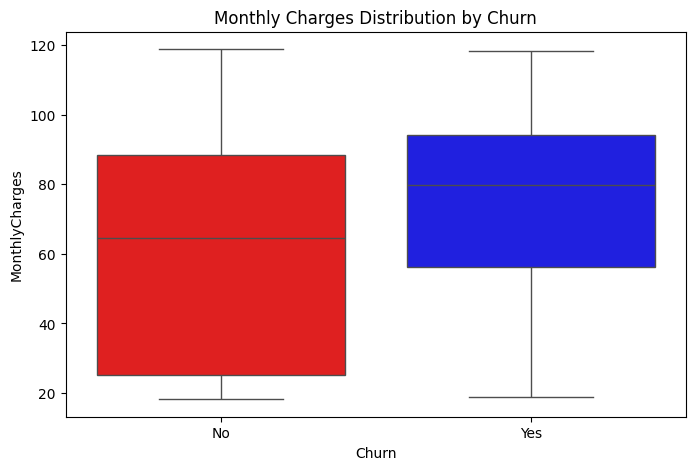

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['red', 'blue'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()

Churn Distribution by Internet Service

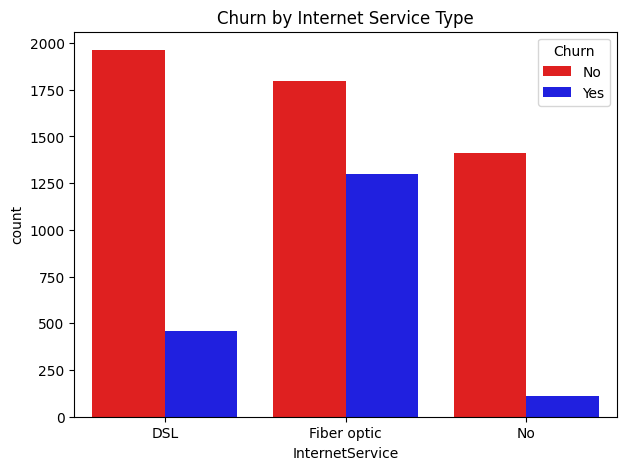

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette=['red', 'blue'])
plt.title('Churn by Internet Service Type')
plt.show()

Churn Distribution by Payment Method

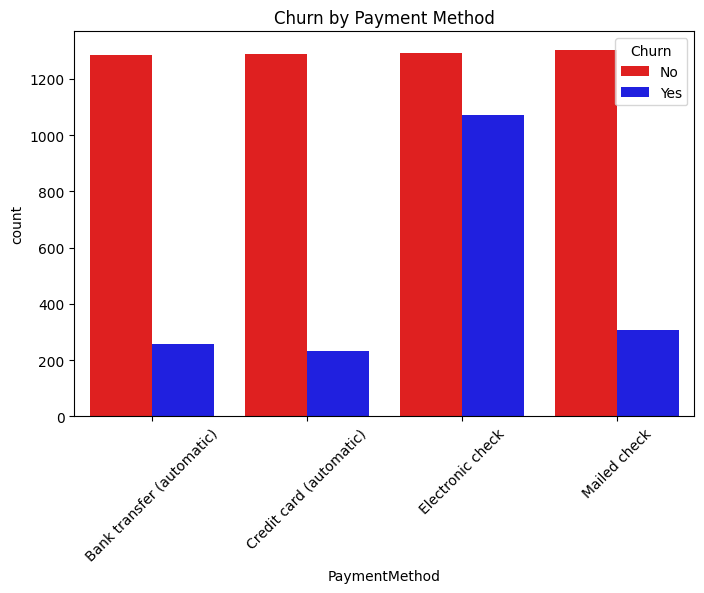

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()

Correlation Heatmap of Numerical Features

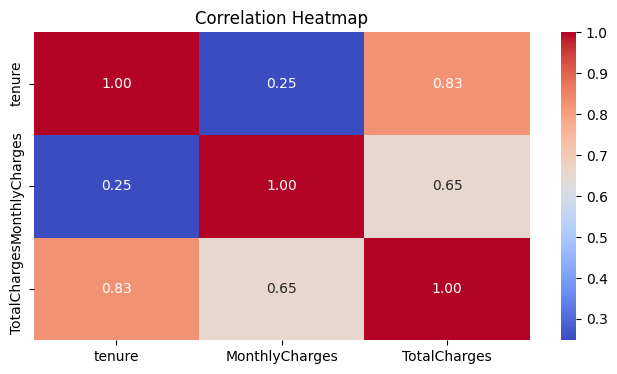

In [62]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [63]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cleaning Categorical Columns for Consistency

In [64]:
# Replacing 'No phone service' -->> NO
# Replacing 'No internet Service' -->> No

df['MultipleLines'].replace('No phone service','No',inplace=True)
df['OnlineSecurity'].replace('No internet service','No',inplace=True)
df['OnlineBackup'].replace('No internet service','No',inplace=True)
df['DeviceProtection'].replace('No internet service','No',inplace=True)
df['TechSupport'].replace('No internet service','No',inplace=True)
df['StreamingTV'].replace('No internet service','No',inplace=True)
df['StreamingMovies'].replace('No internet service','No',inplace=True)

Converting Yes/No Columns to Binary (0/1)

In [66]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [67]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [68]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)


In [69]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Encoding Categorical Variables using One-Hot Encoding

In [72]:
X_encoded = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
X_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [73]:
X_encoded.dtypes


,0
gender,category
SeniorCitizen,int64
Partner,category
Dependents,category
tenure,int64
PhoneService,category
MultipleLines,category
OnlineSecurity,category
OnlineBackup,category
DeviceProtection,category


In [74]:
X_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


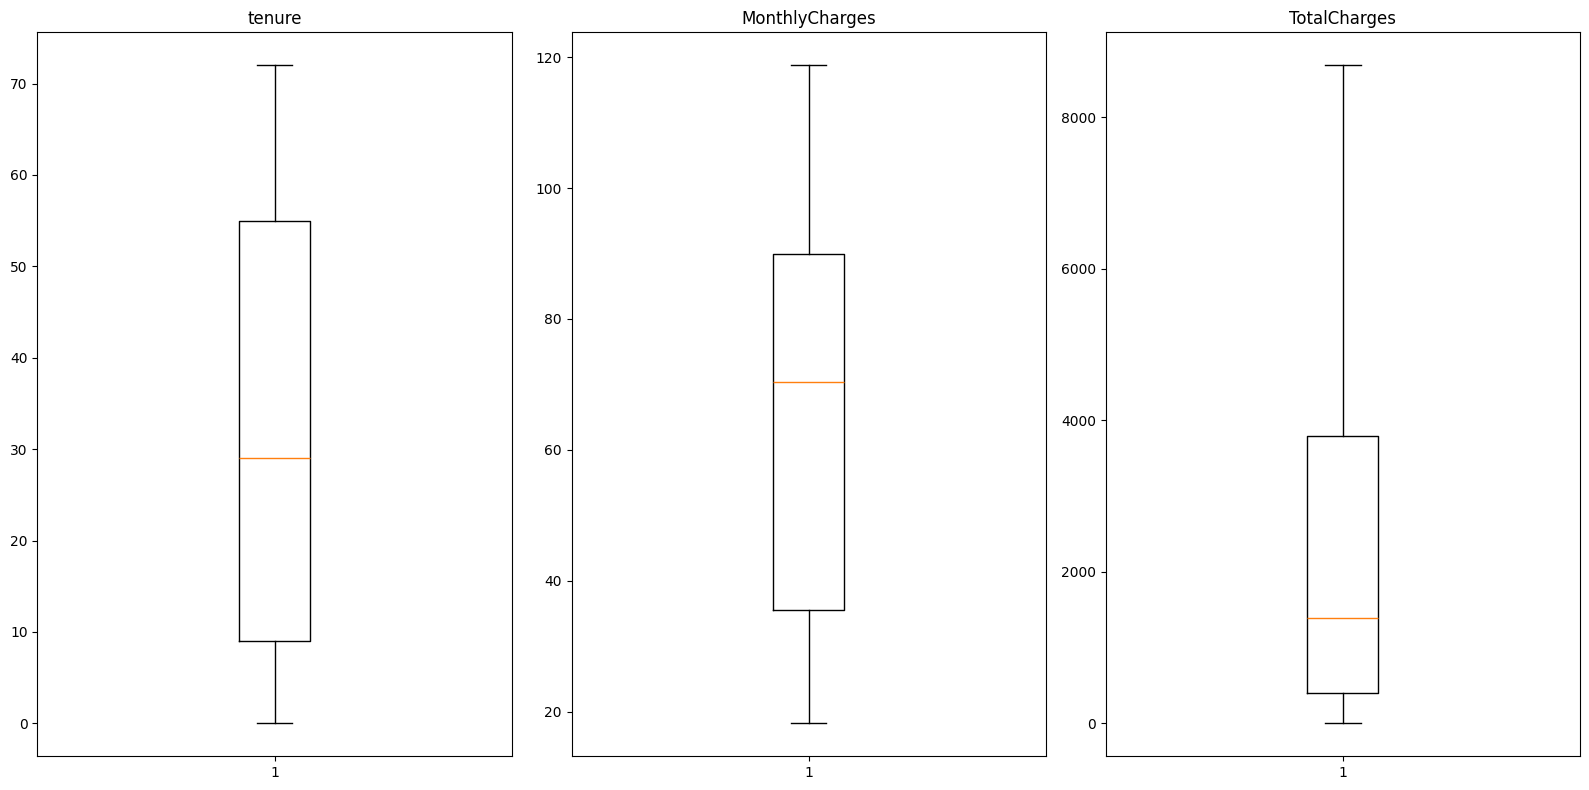

In [76]:
fig,ax = plt.subplots(1,3, figsize=(16,8))

ax[0].title.set_text('tenure')
ax[0].boxplot(df['tenure'])

ax[1].title.set_text('MonthlyCharges')
ax[1].boxplot(df['MonthlyCharges'])

ax[2].title.set_text('TotalCharges')
ax[2].boxplot(df['TotalCharges'])

plt.tight_layout()
plt.show()

# Apparently there are no outliers in the dataset.

Splitting Features and Target Variable

In [105]:
# splitting the features and target
X = X_encoded.drop(columns=["Churn"])
y = X_encoded["Churn"]
X_encoded = pd.get_dummies(X, drop_first=True)

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
# Removed 'AverageMonthlySpend', 'TotalServices' as they are not present in the DataFrame
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

Train and evaluate models

In [117]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')
# %%
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report # Importing necessary functions
import joblib
# %%
# ... (rest of your code) ...


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

 Initialize models

In [118]:

log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)



In [119]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
log_reg_model = evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

Logistic Regression Evaluation:
Model: Logistic Regression
Accuracy: 0.8211
Precision: 0.6850
Recall: 0.6005
F1-Score: 0.6400
ROC-AUC: 0.7506

Confusion Matrix:
[[933 103]
 [149 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [120]:
# Evaluate Random Forest
print("Random Forest Evaluation:")
rf_model = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest Evaluation:
Model: Random Forest
Accuracy: 0.7970
Precision: 0.6570
Recall: 0.4879
F1-Score: 0.5600
ROC-AUC: 0.6981

Confusion Matrix:
[[941  95]
 [191 182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [122]:
# Evaluate XGBoost
print("XGBoost Evaluation:")
xgb_model = evaluate_model(xgb, X_train, X_test, y_train, y_test, "XGBoost")

XGBoost Evaluation:
Model: XGBoost
Accuracy: 0.7984
Precision: 0.6488
Recall: 0.5201
F1-Score: 0.5774
ROC-AUC: 0.7094

Confusion Matrix:
[[931 105]
 [179 194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [123]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

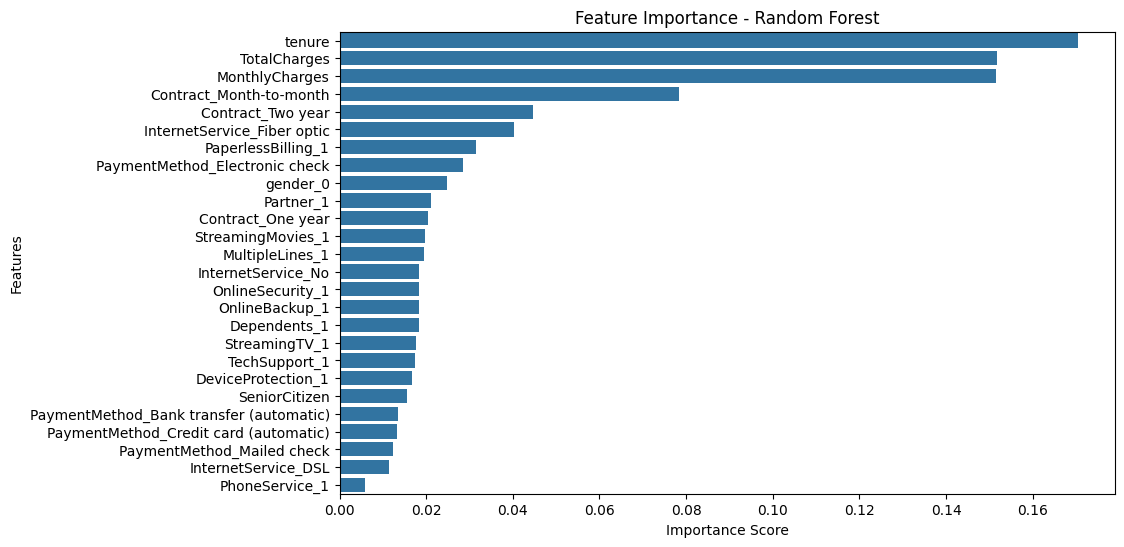

In [132]:
plot_feature_importance(rf_model, X_encoded.columns, "Random Forest")




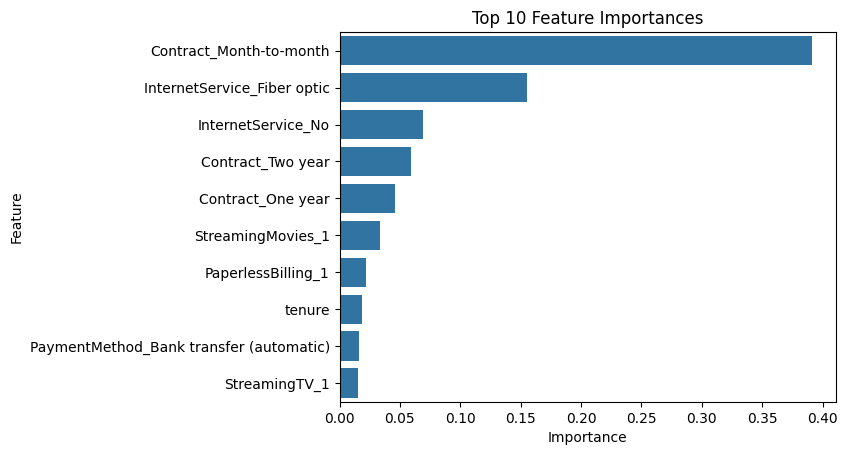

In [130]:

feature_importance = pd.Series(xgb_model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
feature_importance_df = pd.DataFrame({'Feature': feature_importance.index, 'Importance': feature_importance.values})

# Plot top 10 features
sns.barplot(x="Importance", y="Feature", data=feature_importance_df[:10])
plt.title("Top 10 Feature Importances")
plt.show()

Handling Imbalanced Data using *SMOTE*

In [127]:
# prompt: Handling Imbalanced Data using *SMOTE*

# Evaluate Logistic Regression with SMOTE
print("Logistic Regression with SMOTE Evaluation:")
log_reg_smote_model = evaluate_model(log_reg, X_train_smote, X_test, y_train_smote, y_test, "Logistic Regression with SMOTE")

# Evaluate Random Forest with SMOTE
print("Random Forest with SMOTE Evaluation:")
rf_smote_model = evaluate_model(rf, X_train_smote, X_test, y_train_smote, y_test, "Random Forest with SMOTE")

# Evaluate XGBoost with SMOTE
print("XGBoost with SMOTE Evaluation:")
xgb_smote_model = evaluate_model(xgb, X_train_smote, X_test, y_train_smote, y_test, "XGBoost with SMOTE")



Logistic Regression with SMOTE Evaluation:
Model: Logistic Regression with SMOTE
Accuracy: 0.7651
Precision: 0.5405
Recall: 0.7507
F1-Score: 0.6285
ROC-AUC: 0.7605

Confusion Matrix:
[[798 238]
 [ 93 280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.75      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Random Forest with SMOTE Evaluation:
Model: Random Forest with SMOTE
Accuracy: 0.7850
Precision: 0.5845
Recall: 0.6488
F1-Score: 0.6150
ROC-AUC: 0.7414

Confusion Matrix:
[[864 172]
 [131 242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.58      0.65      0.61       373

    accuracy                           0.78      1409
   macr

In [135]:
from sklearn.metrics import roc_auc_score

print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("Logistic Regression AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

print("XGBoost AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


Random Forest AUC: 0.8341204571097333
Logistic Regression AUC: 0.8551179003591872
XGBoost AUC: 0.8339160205782191
